In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\datascience\loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data=data.drop(columns={'Loan_ID'})

In [7]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [9]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data=data.replace({'Gender':{'Male':0,'Female':1}})

In [12]:
data=data.replace({'Married':{'Yes':0,'No':1}})

In [13]:
data=data.replace({'Education':{'Graduate':0,'Not Graduate':1}})

In [14]:
data=data.replace({'Self_Employed':{'Yes':0,'No':1}})

In [15]:
data=data.replace({'Property_Area':{'Urban':0,'Rural':1,'Semiurban':2}})

In [16]:
data=data.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3}})

In [17]:
data=data.replace({'Loan_Status':{'Y':0,'N':1}})

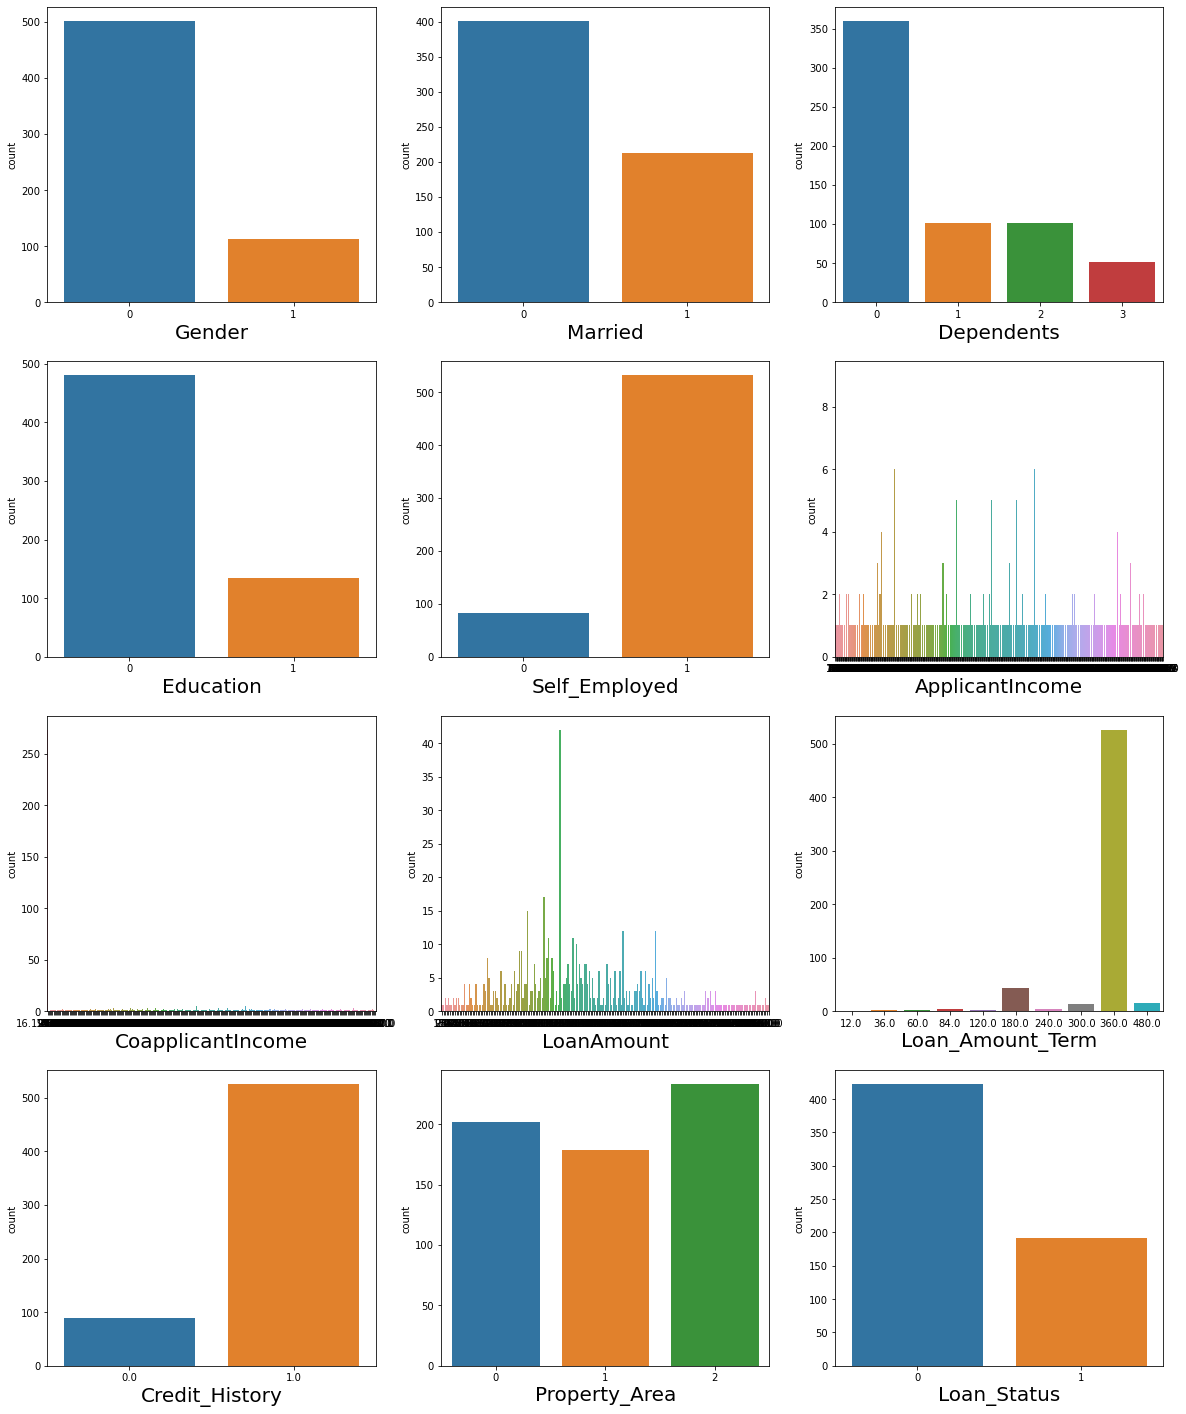

In [18]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [19]:
x=data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

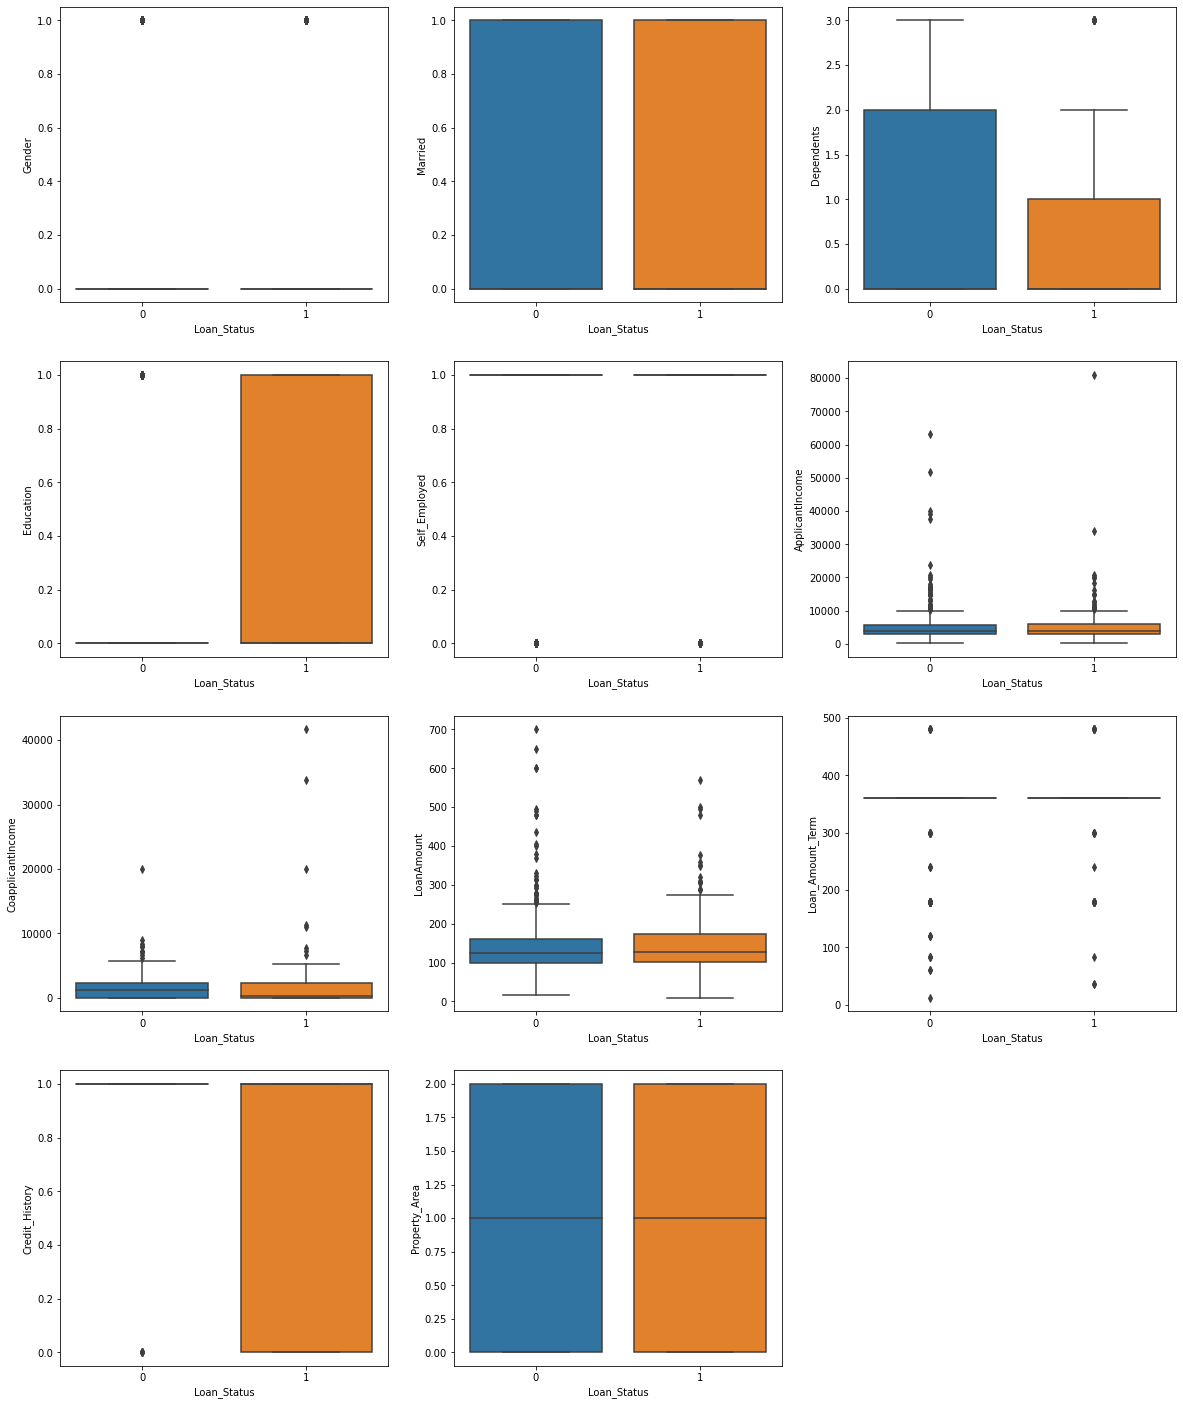

In [20]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in x:
    if plotnumber<=13:
        ax=plt.subplot(4,3, plotnumber)
        sns.boxplot(y,x[column])
    plotnumber+=1
    
plt.show()

In [21]:
q1=data.quantile(0.25)

In [22]:
q3=data.quantile(0.75)

In [23]:
iqr=q3-q1

In [24]:
gen_high=(q3.Gender+1.5*iqr.Gender)
gen_high

0.0

In [25]:
gen_low=(q1.Gender-1.5*iqr.Gender)
gen_low

0.0

In [26]:
married_high=(q3.Married+1.5*iqr.Married)
married_high

2.5

In [27]:
index=np.where(data['Married']>married_high)
index

(array([], dtype=int64),)

In [28]:
married_low=(q1.Married-1.5*iqr.Married)
married_low

-1.5

In [29]:
index=np.where(data['Married']<married_low)
index

(array([], dtype=int64),)

In [30]:
slf_high=(q3.Self_Employed+1.5*iqr.Self_Employed)
slf_high

1.0

In [31]:
index=np.where(data['Self_Employed']>slf_high)
index

(array([], dtype=int64),)

In [32]:
slf_low=(q1.Self_Employed-1.5*iqr.Self_Employed)
slf_low

1.0

In [33]:
index=np.where(data['Self_Employed']<slf_low)
index

(array([  2,   5,  25,  32,  44,  54,  62,  68,  71,  74,  77,  79,  81,
        113, 128, 130, 133, 137, 142, 151, 174, 185, 186, 188, 199, 212,
        213, 226, 229, 237, 243, 245, 252, 254, 264, 280, 286, 313, 319,
        325, 327, 334, 335, 337, 353, 364, 370, 372, 383, 404, 410, 417,
        430, 438, 439, 445, 449, 454, 460, 470, 473, 475, 478, 488, 493,
        498, 508, 522, 523, 525, 534, 550, 557, 561, 563, 589, 591, 592,
        594, 596, 598, 613], dtype=int64),)

In [34]:
data=data.drop(data.index[index])
data.shape

(532, 12)

In [35]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
528,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
529,610,0,0,3,0,1,4106,0.0,40.0,180.0,1.0,1,0
530,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [36]:
app_high=(q3.ApplicantIncome+1.5*iqr.ApplicantIncome)
app_high

10171.25

In [37]:
index=np.where(data['ApplicantIncome']>app_high)
index

(array([  7,  30,  60,  89,  93, 101, 105, 112, 120, 125, 127, 135, 151,
        162, 167, 224, 236, 243, 248, 271, 285, 292, 323, 359, 372, 379,
        388, 408, 420, 424, 440, 442, 463, 497, 523], dtype=int64),)

In [38]:
data=data.drop(data.index[index])
data.shape

(497, 12)

In [39]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
493,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
494,610,0,0,3,0,1,4106,0.0,40.0,180.0,1.0,1,0
495,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [40]:
coap_high=(q3.CoapplicantIncome+1.5*iqr.CoapplicantIncome)
coap_high

5743.125

In [41]:
index=np.where(data['CoapplicantIncome']>coap_high)
index

(array([  9,  32, 101, 110, 143, 146, 205, 283, 330, 362, 414, 472, 485],
       dtype=int64),)

In [42]:
data=data.drop(data.index[index])
data.shape

(484, 12)

In [43]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
480,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
481,610,0,0,3,0,1,4106,0.0,40.0,180.0,1.0,1,0
482,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [44]:
lam_high=(q3.LoanAmount+1.5*iqr.LoanAmount)
lam_high

261.5

In [45]:
index=np.where(data['LoanAmount']>lam_high)
index

(array([ 17,  65, 125, 183, 203, 277, 302, 311, 404, 421], dtype=int64),)

In [46]:
data=data.drop(data.index[index])
data.shape

(474, 12)

In [47]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
470,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
471,610,0,0,3,0,1,4106,0.0,40.0,180.0,1.0,1,0
472,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [48]:
coap_low=(q1.CoapplicantIncome-1.5*iqr.CoapplicantIncome)
coap_low

-3445.875

In [49]:
index=np.where(data['CoapplicantIncome']<coap_low)
index

(array([], dtype=int64),)

In [50]:
lamt_high=(q3.Loan_Amount_Term+1.5*iqr.Loan_Amount_Term)
lamt_high

360.0

In [51]:
index=np.where(data['Loan_Amount_Term']>lamt_high)
index

(array([ 59,  87, 129, 137, 176, 191, 225, 230, 277, 284, 293, 386, 397,
        443], dtype=int64),)

In [52]:
data=data.drop(data.index[index])
data.shape

(460, 12)

In [53]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
456,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
457,610,0,0,3,0,1,4106,0.0,40.0,180.0,1.0,1,0
458,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [54]:
lamt_low=(q1.Loan_Amount_Term-1.5*iqr.Loan_Amount_Term)
lamt_low

360.0

In [55]:
index=np.where(data['Loan_Amount_Term']<lamt_low)
index

(array([ 10,  12,  54,  57,  60,  63,  70,  73,  77,  79, 123, 129, 135,
        138, 149, 173, 181, 182, 185, 194, 210, 237, 266, 273, 278, 280,
        287, 294, 301, 302, 307, 324, 328, 338, 340, 346, 351, 354, 357,
        371, 373, 378, 401, 402, 408, 415, 431, 440, 444, 445, 452, 457],
       dtype=int64),)

In [56]:
data=data.drop(data.index[index])
data.shape

(408, 12)

In [57]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,607,0,0,2,1,1,3987,1411.0,157.0,360.0,1.0,1,0
404,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
405,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
406,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [58]:
cre_high=(q3.Credit_History+1.5*iqr.Credit_History)
cre_high

1.0

In [59]:
index=np.where(data['Credit_History']>cre_high)
index

(array([], dtype=int64),)

In [60]:
cre_low=(q1.Credit_History-1.5*iqr.Credit_History)
cre_low

1.0

In [61]:
index=np.where(data['Credit_History']<cre_low)
index

(array([  5,  11,  14,  15,  16,  26,  36,  49,  50,  52,  54,  75,  78,
        102, 111, 134, 143, 148, 150, 168, 171, 178, 196, 203, 210, 223,
        230, 238, 251, 262, 269, 272, 278, 280, 286, 288, 293, 303, 304,
        305, 313, 319, 326, 331, 333, 343, 350, 355, 359, 365, 369, 376,
        379, 381, 383, 385, 392, 397], dtype=int64),)

In [62]:
data=data.drop(data.index[index])
data.shape

(350, 12)

In [63]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,607,0,0,2,1,1,3987,1411.0,157.0,360.0,1.0,1,0
346,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
347,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
348,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [64]:
prop_high=(q3.Property_Area+1.5*iqr.Property_Area)
prop_high

5.0

In [65]:
index=np.where(data['Property_Area']>prop_high)
index

(array([], dtype=int64),)

In [66]:
prop_low=(q1.Property_Area-1.5*iqr.Property_Area)
prop_low

-3.0

In [67]:
index=np.where(data['Property_Area']<prop_low)
index

(array([], dtype=int64),)

In [68]:
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0,0,0
1,1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,1
2,3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,0
3,4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,0
4,6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,607,0,0,2,1,1,3987,1411.0,157.0,360.0,1.0,1,0
346,608,0,0,0,0,1,3232,1950.0,108.0,360.0,1.0,1,0
347,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,1,0
348,611,0,0,1,0,1,8072,240.0,253.0,360.0,1.0,0,0


In [69]:
x=data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

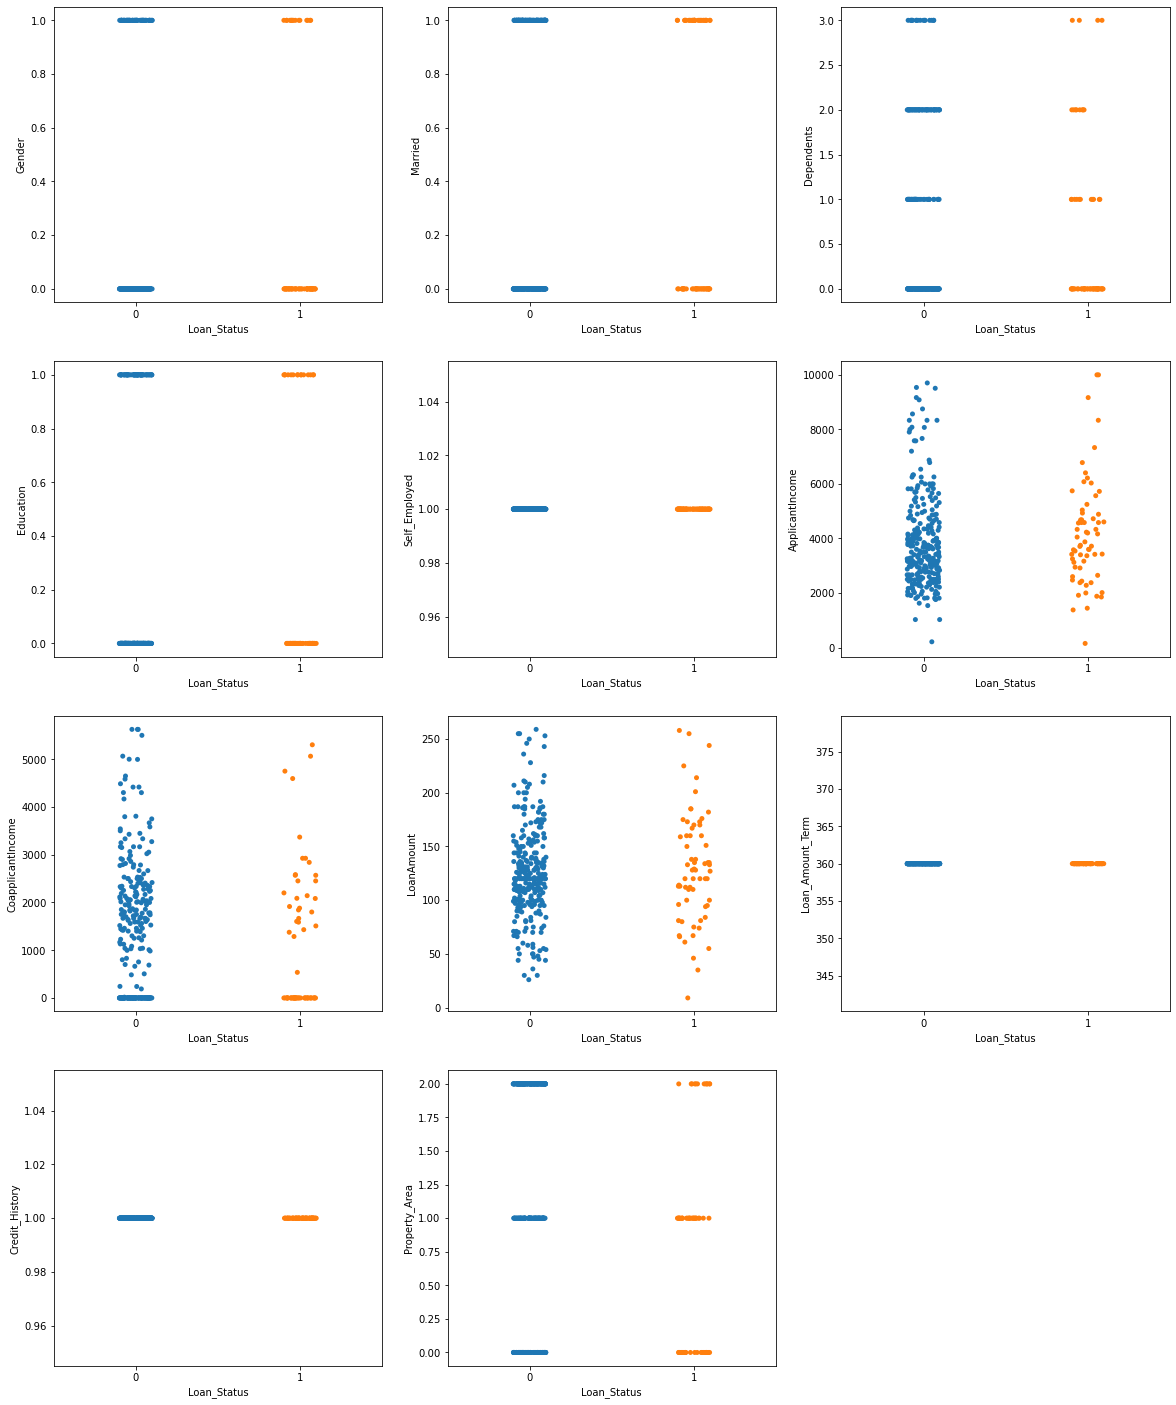

In [70]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in x:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
    
plt.show()

In [74]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [75]:
x_scaled.shape[1]

11

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=350)

In [89]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [94]:
y_pred=log_reg.predict(x_test)

In [95]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [96]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8571428571428571

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [102]:
df=pd.read_csv('E:\datascience\loan_prediction.csv')

In [103]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
df.shape

(614, 13)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
df=df.drop(['Loan_ID'],axis=1)

In [107]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [110]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [116]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

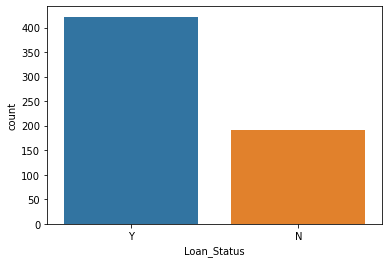

In [117]:
sns.countplot(x='Loan_Status',data=df)
plt.show()

In [118]:
df.shape

(614, 12)

In [119]:
from sklearn.feature_selection import SelectKBest, f_classif

In [122]:
df=df.replace({'Gender':{'Male':0,'Female':1}})

In [123]:
df=df.replace({'Married':{'Yes':0,'No':1}})

In [124]:
df=df.replace({'Education':{'Graduate':0,'Not Graduate':1}})

In [125]:
df=df.replace({'Self_Employed':{'Yes':0,'No':1}})

In [126]:
df=df.replace({'Property_Area':{'Urban':0,'Rural':1,'Semiurban':2}})

In [127]:
df=df.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3}})

In [128]:
df=df.replace({'Loan_Status':{'Y':0,'N':1}})

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [131]:
x=df.drop('Loan_Status', axis=1)
y=df.Loan_Status

In [134]:
best_features=SelectKBest(score_func=f_classif, k=7)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(7,'Score'))

         Feature_Name       Score
9      Credit_History  252.652090
10      Property_Area    6.594980
1             Married    5.164552
3           Education    4.547685
6   CoapplicantIncome    2.151457
7          LoanAmount    0.619831
8    Loan_Amount_Term    0.311334


In [135]:
new_x=df[['Credit_History','Property_Area','Married','Education','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [136]:
new_x

,Credit_History,Property_Area,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0,1,0,0.0,120.0,360.0
1,1.0,1,0,0,1508.0,128.0,360.0
2,1.0,0,0,0,0.0,66.0,360.0
3,1.0,0,0,1,2358.0,120.0,360.0
4,1.0,0,1,0,0.0,141.0,360.0
...,...,...,...,...,...,...,...
609,1.0,1,1,0,0.0,71.0,360.0
610,1.0,1,0,0,0.0,40.0,180.0
611,1.0,0,0,0,240.0,253.0,360.0
612,1.0,0,0,0,0.0,187.0,360.0


In [138]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [139]:
x_train,x_test,y_test,y_train=train_test_split(x_scaler,y,test_size=0.25,random_state=355)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [161]:
knn=KNeighborsClassifier()

In [162]:
y_test

350    0
377    0
163    0
609    0
132    0
      ..
467    0
56     0
318    0
346    1
606    0
Name: Loan_Status, Length: 246, dtype: int64

In [165]:
y_train

332    0
320    0
49     0
274    0
25     0
      ..
71     0
106    0
270    0
435    0
102    0
Name: Loan_Status, Length: 368, dtype: int64